# CORDEX relief from PyGMT

In [1]:
import pygmt
import cordex as cx
import xesmf as xe

In [2]:
def create_relief(domain, resolution):
    ds = cx.cordex_domain(domain, add_vertices=True)
    ds['lon_vertices'] = ds.lon_vertices.roll(vertices=-1)
    ds['lat_vertices'] = ds.lat_vertices.roll(vertices=-1)
    region = [ds.lon.min().data, ds.lon.max().data, ds.lat.min().data, ds.lat.max().data]
    grid = pygmt.datasets.load_earth_relief(resolution=resolution, region=region)
    regridder = xe.Regridder(grid.to_dataset(), ds, method="conservative_normed")
    ds["topo"] = regridder(grid)
    return ds

In [10]:
def plot(da, pole, vmin=None, vmax=None, borders=True):
    """plot a domain using the right projection with cartopy"""
    %matplotlib inline
    import cartopy.crs as ccrs
    import cartopy.feature as cf
    import matplotlib.pyplot as plt

    plt.figure(figsize=(20, 10))
    projection = ccrs.PlateCarree()
    transform = ccrs.RotatedPole(pole_latitude=pole[1], pole_longitude=pole[0])
    # ax = plt.axes(projection=projection)
    ax = plt.axes(projection=transform)
    # ax.set_extent([ds_sub.rlon.min(), ds_sub.rlon.max(), ds_sub.rlat.min(), ds_sub.rlat.max()], crs=transform)
    ax.gridlines(
        draw_labels=True,
        linewidth=0.5,
        color="gray",
        xlocs=range(-180, 180, 10),
        ylocs=range(-90, 90, 5),
    )
    da.plot(
        ax=ax,
        cmap="terrain",
        transform=transform,
        vmin=vmin,
        vmax=vmax,
        x="rlon",
        y="rlat",
    )
    ax.coastlines(resolution="50m", color="black", linewidth=1)
    if borders is True:
        ax.add_feature(cf.BORDERS)
    # Show the grid lines as dark grey lines
    

In [4]:
def test_domain(domain, resolution="01d"):
    ds = create_relief(domain, resolution)
    pole = (
        ds.rotated_latitude_longitude.grid_north_pole_longitude,
        ds.rotated_latitude_longitude.grid_north_pole_latitude,
    )
    plot(ds.topo, pole, vmin=-1000, vmax=3000)
    return ds

/Users/buntemey/miniconda3/envs/pygmt/lib/python3.10/site-packages/cordex/core/domain.py:632: UserWarning: Order of vertices has changed since v0.3.2 to CF Conventions, see https://github.com/euro-cordex/py-cordex/issues/34
  warn(
pygmt-session [WARNING]: Remote dataset given to a data processing module but no registration was specified - default to gridline registration (if available)
grdcut [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: w reset from -44.5938638919 to -44.75
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from 64.9643766672 to 65
grdcut [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: s reset from 21.9878287568 to 21.75
grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset

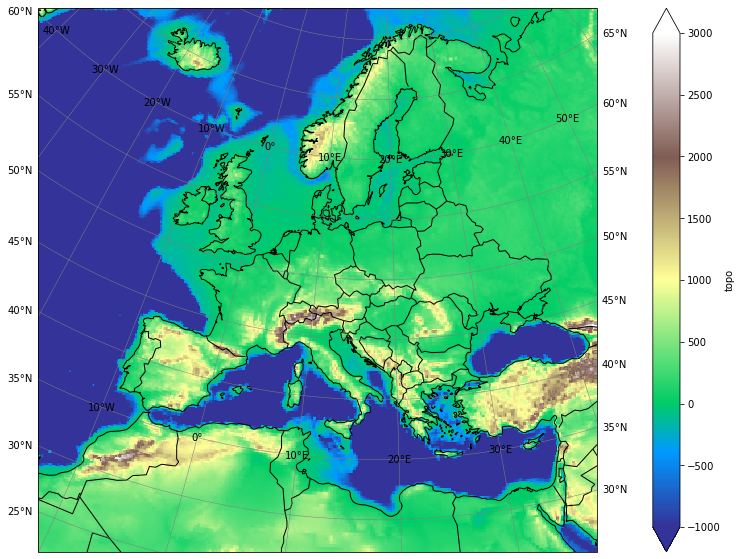

In [5]:
ds = test_domain("EUR-11", resolution="01d")

/Users/buntemey/miniconda3/envs/pygmt/lib/python3.10/site-packages/cordex/core/domain.py:632: UserWarning: Order of vertices has changed since v0.3.2 to CF Conventions, see https://github.com/euro-cordex/py-cordex/issues/34
  warn(
pygmt-session [WARNING]: Remote dataset given to a data processing module but no registration was specified - default to gridline registration (if available)
grdcut [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: w reset from -3.33129210749 to -3.5
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from 17.4263582362 to 17.5
grdcut [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: s reset from 38.2663424608 to 38.25
grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset

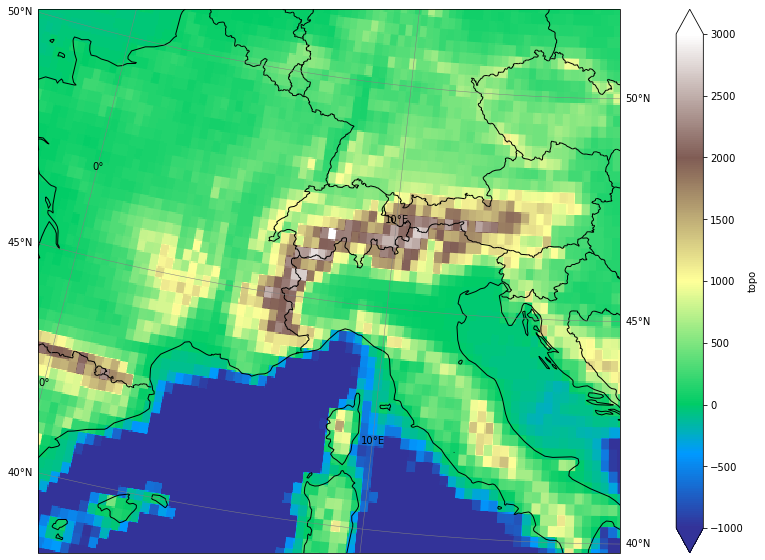

In [26]:
ds = test_domain("GAR-0275", resolution="15m")

/Users/buntemey/miniconda3/envs/pygmt/lib/python3.10/site-packages/cordex/core/domain.py:632: UserWarning: Order of vertices has changed since v0.3.2 to CF Conventions, see https://github.com/euro-cordex/py-cordex/issues/34
  warn(
pygmt-session [WARNING]: Remote dataset given to a data processing module but no registration was specified - default to gridline registration (if available)
grdcut [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: w reset from -3.33129210749 to -3.5
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from 17.4263582362 to 17.5
grdcut [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: s reset from 38.2663424608 to 38
grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset fr

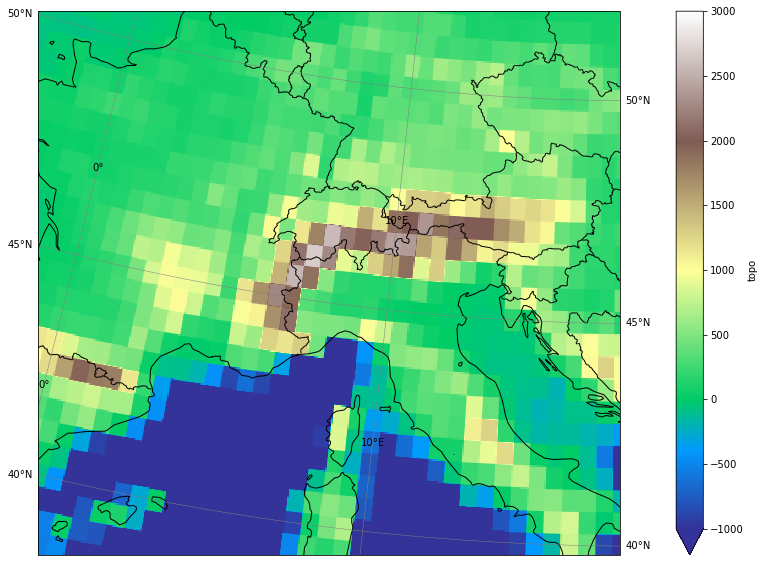

In [27]:
ds = test_domain("GAR-0275", resolution="30m")

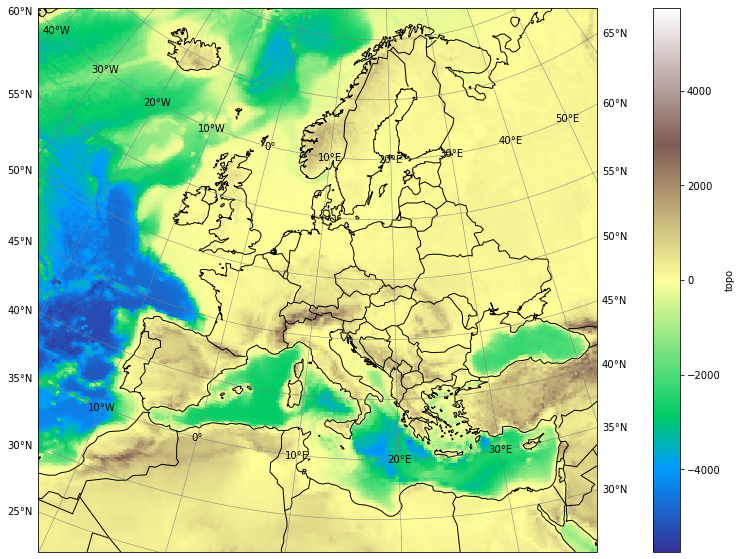

In [11]:
pole = (
        ds.rotated_latitude_longitude.grid_north_pole_longitude,
        ds.rotated_latitude_longitude.grid_north_pole_latitude,
    )
plot(ds.topo, pole)